# Lista 10 de Análise de Dados em Astronomia

Danilo Lessa Bernardineli

In [10]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

## 1 - Hessiana, covariância de um modelo

Seja um modelo dado por $\mu(\alpha, \beta) = \alpha x + \beta x^2$, nos itens seguintes serão calculadas algumas propriedades deste.

### 1a - Matriz Hessiana

Para construir a matriz hessiana, primeiro obtém-se o valor do logaritmo da verossimilhança bem como suas derivadas parciais duplas e mistas em relação aos parâmetros supondo-se que os resíduos destes sejam gaussianos

$$ln \mathcal{L} = -\sum_i{(\mu_i - \alpha x_i - \beta x_i^2)^2}$$
$$\frac{\partial^2 ln\mathcal{L}}{\partial \alpha^2} = -\sum_i{2x_i^2}$$
$$\frac{\partial^2 ln\mathcal{L}}{\partial \beta^2} = -\sum_i{2x_i^4}$$
$$\frac{\partial^2 ln\mathcal{L}}{\partial \alpha \partial \beta} = -\sum_i{2x_i^3}$$

Com esses resultados, o hessiano é expressa então como:

$$
\mathcal{H} = -2
\begin{bmatrix}
    \sum_i x_i^2 & \sum_i x_i^3 \\
    \sum_i x_i^3 & \sum_i x_i^4
\end{bmatrix}
$$


### 1b - Matriz de covariância

Seja uma matriz M dada por

$$
M = 
\begin{bmatrix}
    \alpha & \beta \\
    \beta & \gamma
\end{bmatrix}
$$

A sua matriz inversa caso existir é dada por:

$$
M^{-1} = 
\begin{bmatrix}
    a + b^2 c & -b c \\
    -b c & c \\
\end{bmatrix}
$$

onde $a = \frac{1}{\alpha}$, $b = \frac{\beta}{\alpha}$, $c = \frac{1}{\gamma^2 - b^2}$

Ao substituir com os elementos do Hessiano, tem-se que a inversa deste é dada por

$$
C = 
\begin{bmatrix}
    \frac{1}{\sum x^2} + (\frac{\sum x^3}{\sum x^2})^2 \frac{1}{(\sum x^4)^2 - (\frac{\sum x^3}{\sum x^2})^2} & -(\frac{\sum x^3}{\sum x^2}) \frac{1}{(\sum x^4)^2 - (\frac{\sum x^3}{\sum x^2})^2}\\
     -(\frac{\sum x^3}{\sum x^2}) \frac{1}{(\sum x^4)^2 - (\frac{\sum x^3}{\sum x^2})^2} &
     \frac{1}{(\sum x^4)^2 - (\frac{\sum x^3}{\sum x^2})^2}
\end{bmatrix}
$$

### 1c - Variância de $\beta$

A variância de $\beta$ é o segundo elemento da diagonal de $C$, portanto $Var[\beta]$ = $\frac{1}{(\sum x^4)^2 - (\frac{\sum x^3}{\sum x^2})^2}$

### 1d - Impacto da localização das medidas $x_i$ na variância de $\beta$

A localização das medidas influencia a variância de $\beta$ através de seus segundo, terceiro e quarto momentos, os quais podem ser interpretados como sendo a dispersão, assimetria e curtose das localizações.

Um aumento na variância das medições implica em um aumento na variância de $\beta$), enquanto que um aumento na assimetria dos dados (o qual está associado com o terceiro momento) implica na diminuição da variância

Um aumento no quarto momento, que é um número sensível a presença de outliers implica em uma diminuição da variância de $\beta$

## 2 - Ajustes comuns na Astronomia

### 2a - Geração de dados distribuídos numa gaussiana bivariada
São gerados 1000 pares (x, y) distribuidas em uma gaussiana bivariada de variancia 1 em ambos os eixos e cov[x, y] = 0.7

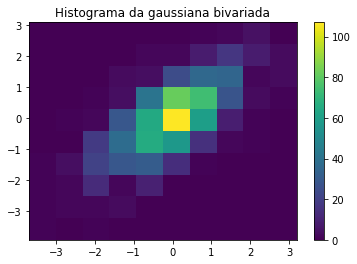

In [2]:
N = int(1000)
c = 0.7
mean = (0, 0)
cov = [[1, c], [c, 1]]

(x, y) = np.random.multivariate_normal(mean, cov, N).T

plt.hist2d(x, y)
plt.title("Histograma da gaussiana bivariada")
plt.colorbar()
plt.show()

### 2b - Ajuste de reta aos dados
Ajusta-se uma reta ax+b ao (x, y) gerados usandos os mínimos quadrados

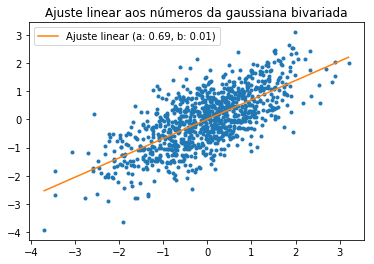

In [3]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)

x_min = np.min(x)
x_max = np.max(x)
x_lin = np.linspace(x_min, x_max, 1000)
y_lin = slope * x_lin + intercept

plt.title("Ajuste linear aos números da gaussiana bivariada")
plt.plot(x, y, '.')
plt.plot(x_lin, y_lin, label="Ajuste linear (a: %.2f, b: %.2f)" % (slope, intercept))
plt.legend()
plt.show()

### 2c - Descarte de dados

In [4]:
inds = (y > 0)
y_new = y[inds]
x_new = x[inds]

### 2d - Ajuste aos novos dados

Nota-se uma diferença no ajuste linear aos novos dados, o que é esperado dada a perca de simetria no eixo y ao fazer o recorte $y > 0$

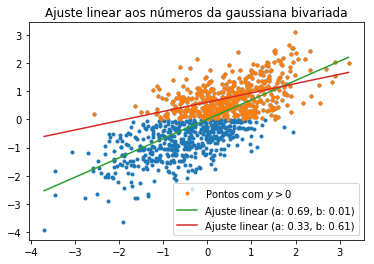

In [5]:
(slope_new, intercept_new, rvalue, pvalue, stderr) = st.linregress(x_new, y_new)

x_min = np.min(x)
x_max = np.max(x)
x_lin_n = np.linspace(x_min, x_max, 1000)
y_lin_n = slope_new * x_lin + intercept_new

plt.title("Ajuste linear aos números da gaussiana bivariada")
plt.plot(x, y, '.')
plt.plot(x_new, y_new, '.', label="Pontos com $y > 0$")
plt.plot(x_lin, y_lin, label="Ajuste linear (a: %.2f, b: %.2f)" % (slope, intercept))
plt.plot(x_lin_n, y_lin_n, label="Ajuste linear (a: %.2f, b: %.2f)" % (slope_new, intercept_new))
plt.legend()
plt.show()

## 3 - Ajuste via MCMC

### 3a - Geração de dados

São geradas uma sequência de 100 pares (x, y) na qual y é gaussiana e $y = ax + b$

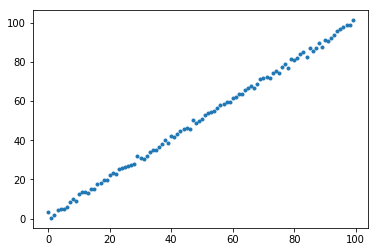

In [6]:
N = 100
a = 1
b = 1
sigma_y = 1
x = np.arange(100)
yavg = a * x + b
y = np.random.randn(N) * sigma_y + yavg


plt.plot(x, y, '.')
plt.show()

### 3b - Likelihood

In [7]:
def L(x, y, a, b, c):
    y_avg = a * x + b
    l = -np.sum((y - y_avg) ** 2) / (2 * c)
    return np.exp(l)

### 3c - Algoritmo de Metropolis

Nessa etapa, utiliza-se o algoritmo de metropolis para calcular os parâmetros a, b e c

In [8]:
N = 1000000
a = 0
b = 0
c = 1
s = 0.01
l = L(x, y, a, b, c)

al = []
bl = []
cl = []
ll = []
il = []

for i in range(N):
    a_n = a + np.random.randn() * s
    b_n = b + np.random.randn() * s
    c_n = c + np.random.randn() * s
    l_n = L(x, y, a_n, b_n, c_n)
    p = l_n / l
    
    if p < 1:
        if np.random.rand() > p:
            continue
    
    al.append(a_n)
    bl.append(b_n)
    cl.append(c_n)
    ll.append(l_n)
    il.append(i)
    a = a_n
    b = b_n
    c = c_n
    l = l_n

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars


### 3d - resultados
Nota-se que o parâmetro a e b estão dentro do esperado. O parâmetro c porém explode (o que é esperado, dado que valores maiores de c sempre aumentam o likelihood)

In [88]:
def show_stat(l, s):
    print("Parametro %s:\tMédia: %.2f, Mediana: %.2f" % (s, np.mean(l), np.median(l)))

In [89]:
show_stat(al, "a")
show_stat(bl, "b")
show_stat(cl, "c")

Parametro a:	Média: 0.98, Mediana: 0.99
Parametro b:	Média: 1.35, Mediana: 1.38
Parametro c:	Média: 11.60, Mediana: 12.28


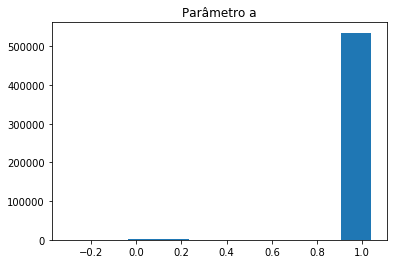

In [80]:
plt.hist(al)
plt.title("Parâmetro a")
plt.show()

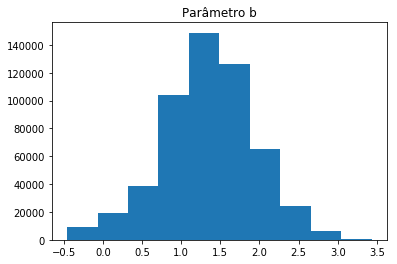

In [81]:
plt.hist(bl)
plt.title("Parâmetro b")
plt.show()

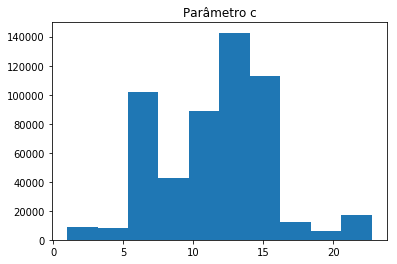

In [82]:
plt.hist(cl)
plt.title("Parâmetro c")
plt.show()